# ETL y EDA PI2 TELECOMUNICACIONES

#### Después de una revisión de los diferentes documentos propuestos se decide analizar la hoja de 'Accesos por tecnología por localidad' del libro internet.xlsx y el libro mapa_conectividad.xlsx

## 1.1 ETL de 'Accesos por tecnología por localidad'
* Cargamos las librerías a usar

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/home/negoveron/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


* Cargamos los datos

In [3]:

internet = pd.read_excel('Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

* observamos numero de filas y columnas

In [4]:

internet.shape

(3352, 13)

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


**_Se observa que hay valores faltantes en los datos geograficos y Link indec que lo llamaré código Indec_**

**_Hay 3352 filas, codigo indec tiene 3072 no nulas, hay 280 de se deben analizar_**

In [10]:

internet[(internet['Link Indec'].isnull()) & (internet['Total general'] == 0)].shape

(280, 13)

* Comprobamos que en esas filas donde link indec es null, hay 280 donde la suma de los diferentes servicios siempre es cero, se pueden eliminar.

* Hacemos un sampleo y vemos siempre valores nulos

In [ ]:
internet[(internet['Link Indec'].isnull())].sample(15)

* Se eliminan las filas con codigo indec null y total general en cero

In [15]:
i = internet[(internet['Link Indec'].isnull()) & (internet['Total general'] == 0)].index
internet.drop(i, inplace=True)
internet.shape

(3072, 13)

* Controlamos si quedan filas donde Total general es cero

_No tiene sentido conservar, eliminamos_

In [16]:

internet[(internet['Total general'] == 0)]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
2101,NEUQUEN,Picunches,Bajada del Agrio,58105010,0,0,0,0,0,0,0,0,0
2251,SALTA,Grl. José de San Martín,Padre Lozano,66056180,0,0,0,0,0,0,0,0,0
2481,San Luis,Libertador Grl. San Martín,El Puesto,74063050,0,0,0,0,0,0,0,0,0
2537,SANTA FE,Castellanos,Bauer y Sigel,82021060,0,0,0,0,0,0,0,0,0
2833,SANTA FE,San Martín,Las Petacas,82126100,0,0,0,0,0,0,0,0,0


In [17]:

internet = internet[(internet['Total general'] != 0)]
internet.shape

(3067, 13)

* Evalúo si tengo codigos de indec repetidos

In [18]:

print(f"Codigos de indec distintos: {internet['Link Indec'].nunique()}")


Codigos de indec distintos: 2667


In [10]:
internet['Link Indec'].describe()

count          3067
unique         2667
top       Sin Datos
freq             70
Name: Link Indec, dtype: object

In [22]:
internet['Link Indec'].value_counts()

Link Indec
Sin Datos    70
6441030      27
6371010      27
6427010      15
6840010      15
             ..
14140080      1
14140090      1
14140110      1
14140160      1
90119030      1
Name: count, Length: 2667, dtype: int64

In [ ]:
#internet[internet['Link Indec'] == 'Sin Datos']
internet[internet['Link Indec'] == 6441030]

**_Se observa que hay muchas ubicaciones, 70 en total, que no tienen codigo indec_**

**_Tambien hay muchas localidades que comparten el codigo indec, son al menos 330_**

#### No se puede usar codigo indec como clave!!!

## 1.2 Evalúo utilizar los datos geográficos como clave

* Estudio Provincia, Partido, Localidad

In [42]:

internet[['Provincia','Partido','Localidad']].duplicated().value_counts()


False    3067
Name: count, dtype: int64

**_No hay duplicados_**

In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3067 entries, 0 to 3071
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3067 non-null   object
 1   Partido        3067 non-null   object
 2   Localidad      3067 non-null   object
 3   Link Indec     3067 non-null   object
 4   ADSL           3067 non-null   int64 
 5   CABLEMODEM     3067 non-null   int64 
 6   DIAL UP        3067 non-null   int64 
 7   FIBRA OPTICA   3067 non-null   int64 
 8   OTROS          3067 non-null   int64 
 9   SATELITAL      3067 non-null   int64 
 10  WIMAX          3067 non-null   int64 
 11  WIRELESS       3067 non-null   int64 
 12  Total general  3067 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 335.5+ KB


In [20]:
internet.drop(columns=['Link Indec','Total general'],inplace=True)

* Elimino columnas que no voy a utilizar, Total General podria recrearlo si lo necesito

* Convierto en mayusculas los campos que voy a usar como clave

In [21]:
internet['Provincia'] = internet['Provincia'].str.upper()
internet['Partido'] = internet['Partido'].str.upper()
internet['Localidad'] = internet['Localidad'].str.upper()

* Normalizo algunos nombres columnas

In [22]:
internet.rename(columns={'Provincia':'PROVINCIA','Partido':'PARTIDO','Localidad':'LOCALIDAD','DIAL UP':'DIAL_UP', 'FIBRA OPTICA': 'FIBRA_OPTICA'},inplace=True)

In [23]:
internet[internet['PROVINCIA'] == 'CABA'][['PARTIDO','LOCALIDAD']]

,PARTIDO,LOCALIDAD
715,CIUDAD AUTÓNOMA DE BUENOS AIRES,CIUDAD AUTÓNOMA DE BUENOS AIRES


**_Observamos que CABA no esta divido por partidos y localidades, está agrupado en 'Ciudad Autónoma de Buenos Aires'. para facilitar el merge actualizaremos los valores con la comuna y barrio mas poblado 'COMUNA 14', 'PALERMO'_**

In [26]:

internet.loc[internet['PARTIDO'] == 'CIUDAD AUTÓNOMA DE BUENOS AIRES', 'PARTIDO'] = 'COMUNA 14'
internet.loc[internet['LOCALIDAD'] == 'CIUDAD AUTÓNOMA DE BUENOS AIRES', 'LOCALIDAD'] = 'PALERMO'


In [27]:
internet[internet['PROVINCIA'] == 'CABA'][['PROVINCIA','PARTIDO','LOCALIDAD']]

,PROVINCIA,PARTIDO,LOCALIDAD
715,CABA,COMUNA 14,PALERMO


Guardar como csv

In [28]:

internet.to_csv(r'internet_depurado.csv',index=False)

## 1.3 ETL de mapa de conectividad

*  Cargamos los datos

In [30]:


mapa = pd.read_excel('pruebas/mapa_conectividad.xlsx')
mapa.head(5)


,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


In [48]:
mapa.shape

(4305, 16)

In [49]:
mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   object 
 5   Cablemódem      4305 non-null   object 
 6   Dial Up         4305 non-null   object 
 7   Fibra óptica    4305 non-null   object 
 8   Satelital       4305 non-null   object 
 9   Wireless        4305 non-null   object 
 10  Telefonía Fija  4305 non-null   object 
 11  3G              4305 non-null   object 
 12  4G              4305 non-null   object 
 13  Link            4293 non-null   float64
 14  Latitud         4305 non-null   float64
 15  Longitud        4305 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 538.2+ KB


**_Como se observa, solo la columna link tiene nulos, se descartará dicha columna_**

In [31]:
mapa.drop(columns='Link', inplace=True)

* Se convertiran en booleanas las columnas ADSL, Cablemódem, Dial Up,Fibra óptica, Satelital, Wireless, Telefonía Fija, 3G y 4G            

In [32]:
mapa['ADSL'] = np.where(mapa['ADSL'].str.upper().eq('SI'), True, False)
mapa['Cablemódem'] = np.where(mapa['Cablemódem'].str.upper().eq('SI'), True, False)
mapa['Dial Up'] = np.where(mapa['Dial Up'].str.upper().eq('SI'), True, False)
mapa['Fibra óptica'] = np.where(mapa['Fibra óptica'].str.upper().eq('SI'), True, False)
mapa['Satelital'] = np.where(mapa['Satelital'].str.upper().eq('SI'), True, False)
mapa['Wireless'] = np.where(mapa['Wireless'].str.upper().eq('SI'), True, False)
mapa['Telefonía Fija'] = np.where(mapa['Telefonía Fija'].str.upper().eq('SI'), True, False)
mapa['3G'] = np.where(mapa['3G'].str.upper().eq('SI'), True, False)
mapa['4G'] = np.where(mapa['4G'].str.upper().eq('SI'), True, False)
mapa.head(5)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,True,True,False,False,True,True,True,True,True,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,False,False,False,False,False,False,True,False,False,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,True,False,False,False,True,False,False,True,False,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,True,False,False,False,False,False,True,False,False,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,False,False,False,False,False,True,False,False,False,-35.164397,-60.081358


* Convierto en mayusculas los campos que voy a usar como clave

In [33]:
mapa['Provincia'] = mapa['Provincia'].str.upper()
mapa['Partido'] = mapa['Partido'].str.upper()
mapa['Localidad'] = mapa['Localidad'].str.upper()
mapa.head(5)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 DE MAYO,25 DE MAYO,23408,True,True,False,False,True,True,True,True,True,-35.433939,-60.173121
1,BUENOS AIRES,25 DE MAYO,AGUSTÍN MOSCONI,280,False,False,False,False,False,False,True,False,False,-35.739217,-60.559063
2,BUENOS AIRES,25 DE MAYO,DEL VALLE,899,True,False,False,False,True,False,False,True,False,-35.897345,-60.731609
3,BUENOS AIRES,25 DE MAYO,ERNESTINA,145,True,False,False,False,False,False,True,False,False,-35.270234,-59.557503
4,BUENOS AIRES,25 DE MAYO,GOBERNADOR UGARTE,547,False,False,False,False,False,True,False,False,False,-35.164397,-60.081358


* Normalizo los nombres de columnas

In [34]:
mapa.rename(columns={'Provincia':'PROVINCIA','Partido':'PARTIDO','Localidad':'LOCALIDAD','Población':'POBLACION','ADSL':'M_ADSL','Cablemódem':'M_CABLEMODEM','Dial Up':'M_DIAL_UP','Fibra óptica':'M_FIBRA_OPTICA','Satelital':'M_SATELITAL','Wireless':'M_WIRELESS','Telefonía Fija':'M_TELEFONIA_FIJA','3G':'M_3G','4G':'M_4G','Latitud':'LATITUD','Longitud':'LONGITUD'},inplace=True)


* Voy a calcular la distancia de cada localidad con respecto al barrio (de CABA) de mayor poblacion, el centro.

In [35]:

mapa.loc[mapa[mapa.PROVINCIA == 'CABA'].POBLACION.idxmax()][['PROVINCIA','PARTIDO','LOCALIDAD','POBLACION']]

PROVINCIA         CABA
PARTIDO      COMUNA 14
LOCALIDAD      PALERMO
POBLACION       225970
Name: 720, dtype: object

* defino los metodos para calcular la distancia en KM

In [36]:

def rad2deg(radians):
    degrees = radians * 180 / np.pi
    return degrees

def deg2rad(degrees):
    radians = degrees * np.pi / 180
    return radians

def getDistanceBetweenPoints(latitude1, longitude1, latitude2, longitude2):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        np.arccos(
            (np.sin(deg2rad(latitude1)) * np.sin(deg2rad(latitude2))) + 
            (np.cos(deg2rad(latitude1)) * np.cos(deg2rad(latitude2)) * np.cos(deg2rad(theta)))
        )
    )
    
    return round(distance * 1.609344, 2)

In [37]:
lat2 = mapa[mapa['LOCALIDAD'] == 'PALERMO']['LATITUD'].values[0]
lon2 = mapa[mapa['LOCALIDAD'] == 'PALERMO']['LONGITUD'].values[0]
mapa['DISTANCIA'] = mapa.apply(lambda row: getDistanceBetweenPoints(row['LATITUD'], row['LONGITUD'],lat2, lon2), axis=1)

mapa.head(5)

,PROVINCIA,PARTIDO,LOCALIDAD,POBLACION,M_ADSL,M_CABLEMODEM,M_DIAL_UP,M_FIBRA_OPTICA,M_SATELITAL,M_WIRELESS,M_TELEFONIA_FIJA,M_3G,M_4G,LATITUD,LONGITUD,DISTANCIA
0,BUENOS AIRES,25 DE MAYO,25 DE MAYO,23408,True,True,False,False,True,True,True,True,True,-35.433939,-60.173121,185.92
1,BUENOS AIRES,25 DE MAYO,AGUSTÍN MOSCONI,280,False,False,False,False,False,False,True,False,False,-35.739217,-60.559063,233.48
2,BUENOS AIRES,25 DE MAYO,DEL VALLE,899,True,False,False,False,True,False,False,True,False,-35.897345,-60.731609,256.18
3,BUENOS AIRES,25 DE MAYO,ERNESTINA,145,True,False,False,False,False,False,True,False,False,-35.270234,-59.557503,129.24
4,BUENOS AIRES,25 DE MAYO,GOBERNADOR UGARTE,547,False,False,False,False,False,True,False,False,False,-35.164397,-60.081358,164.96


* controlo la distancia maxima

In [38]:

mapa.loc[mapa.DISTANCIA.idxmax()][['PROVINCIA','PARTIDO','LOCALIDAD','POBLACION','DISTANCIA']]

PROVINCIA       TIERRA DEL FUEGO
PARTIDO      ANTARTIDA ARGENTINA
LOCALIDAD       BASE BELGRANO II
POBLACION                      0
DISTANCIA                 4949.6
Name: 3234, dtype: object

* guardar como csv

In [39]:

mapa.to_csv(r'mapa_depurado.csv',index=False)

In [40]:
mapa = pd.read_csv('pruebas/mapa_depurado.csv')

## 1.4 Hago el merge de mapa e internet

In [41]:
print(internet.shape)
print(mapa.shape)

(3067, 11)
(4305, 16)


In [42]:
mapa_internet = pd.merge(mapa, internet, on=['PROVINCIA','PARTIDO','LOCALIDAD'], how='left')
mapa_internet.shape

(4305, 24)

In [45]:
mapa_internet.sample(10)

,PROVINCIA,PARTIDO,LOCALIDAD,POBLACION,M_ADSL,M_CABLEMODEM,M_DIAL_UP,M_FIBRA_OPTICA,M_SATELITAL,M_WIRELESS,...,LONGITUD,DISTANCIA,ADSL,CABLEMODEM,DIAL_UP,FIBRA_OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
755,MENDOZA,LUJÁN DE CUYO,BARRIO ADINA I Y II,0,False,False,False,False,False,False,...,-68.887701,980.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3550,CORDOBA,TULUMBA,SAN PEDRO NORTE,317,False,False,False,False,False,True,...,-64.155954,733.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
1590,CORDOBA,MARCOS JUÁREZ,ALEJO LEDESMA,3299,False,False,False,True,True,True,...,-62.626141,401.68,0.0,0.0,0.0,1.0,0.0,3.0,0.0,64.0
3716,TUCUMAN,CRUZ ALTA,COLOMBRES,5086,False,False,False,False,False,True,...,-65.099941,1066.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1171,BUENOS AIRES,BALCARCE,BALCARCE,38376,True,True,True,True,False,True,...,-58.255167,364.39,1347.0,11903.0,36.0,45.0,9.0,0.0,0.0,883.0
663,CORDOBA,COLÓN,CANTERAS EL SAUCE,290,False,False,False,False,False,False,...,-64.314534,673.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1587,CORDOBA,GENERAL SAN MARTÍN,ARROYO ALGODÓN,677,True,False,False,True,False,True,...,-63.162786,512.97,159.0,0.0,0.0,1.0,0.0,0.0,0.0,226.0
1817,SAN LUIS,GENERAL PEDERNERA,5TA BRIGADA,0,False,False,False,False,False,False,...,-65.381038,647.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3376,MENDOZA,SAN MARTÍN,MONTECASEROS,1106,False,False,False,False,False,True,...,-68.393680,937.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
349,SALTA,GENERAL GÜEMES,EL BORDO,5833,False,False,False,True,False,True,...,-65.105255,1276.60,0.0,0.0,0.0,61.0,0.0,0.0,0.0,5.0


In [48]:
mapa_internet['ADSL'].isna().value_counts()

ADSL
False    2952
True     1353
Name: count, dtype: int64

#### Hay 2952 filas donde ADSL no es NA, eso significa que matcheó el merge, pero contra las 3067 filas del dataset de la derecha veo que hay mas de 100 filas de internet que no matchearon
**_Observo que estoy dejando afuera mas 100 localidades que tienen datos relevantes pero no matcheo con la base de localidades, analizo un merge en sentido contrario_**

In [58]:

internet_mapa = pd.merge(internet,mapa, on=['PROVINCIA','PARTIDO','LOCALIDAD'], how='left')
print(f'Filas del dataset de internet que no matchearon con la BD de mapa: {internet_mapa[internet_mapa["M_ADSL"].isna()].shape[0]}')
print(internet_mapa[internet_mapa['M_ADSL'].isna()]['PROVINCIA'].value_counts().nlargest(1))
print(internet_mapa[internet_mapa['M_ADSL'].isna()]['PARTIDO'].value_counts().nlargest(1))
print(internet_mapa[internet_mapa['M_ADSL'].isna()]['LOCALIDAD'].value_counts().nlargest(1))

Filas del dataset de internet que no matchearon con la BD de mapa: 115
PROVINCIA
BUENOS AIRES    62
Name: count, dtype: int64
PARTIDO
OTROS    15
Name: count, dtype: int64
LOCALIDAD
OTROS    66
Name: count, dtype: int64


**_Se observa que la mayoria son de la Provincia de Buenos Aires y de aquellos partidos y localidades sin ubicacion exactas bajo la denominacion 'OTROS'_**

**_Hago un inner join, y me quedo con las columnas poblacion y distancia relevantes para el EDA_**

In [59]:

internet_mapa = pd.merge( internet,mapa[['PROVINCIA','PARTIDO','LOCALIDAD','POBLACION','DISTANCIA']], on=['PROVINCIA','PARTIDO','LOCALIDAD'])
internet_mapa.shape

(2952, 13)

* actualizo la Poblacion del registro que representa a CABA

In [60]:

internet_mapa.loc[internet_mapa['PROVINCIA'] == 'CABA', 'POBLACION'] = mapa[mapa['PROVINCIA'] == 'CABA']['POBLACION'].sum()
internet_mapa[internet_mapa['PROVINCIA'] == 'CABA']['POBLACION']

653    2890151
Name: POBLACION, dtype: int64

In [61]:
internet_mapa.head()

,PROVINCIA,PARTIDO,LOCALIDAD,ADSL,CABLEMODEM,DIAL_UP,FIBRA_OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,POBLACION,DISTANCIA
0,BUENOS AIRES,25 DE MAYO,25 DE MAYO,755,4600,0,2,0,742,0,727,23408,185.92
1,BUENOS AIRES,25 DE MAYO,DEL VALLE,181,0,0,0,10,1,0,0,899,256.18
2,BUENOS AIRES,25 DE MAYO,GOBERNADOR UGARTE,0,0,0,0,0,0,0,181,547,164.96
3,BUENOS AIRES,25 DE MAYO,NORBERTO DE LA RIESTRA,0,782,0,496,16,0,0,185,4524,145.51
4,BUENOS AIRES,25 DE MAYO,LUCAS MONTEVERDE,0,0,0,0,0,0,0,6,63,174.80


* guardar como csv

In [62]:

internet_mapa.to_csv(r'mapa_internet.csv',index=False)

## 2. EDA del dataset internet mapa

* Resultado del último merge del ETL

In [63]:
df_internet = pd.read_csv(r'mapa_internet.csv', sep=',')

* Verificar datos y col

In [64]:

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PROVINCIA     2952 non-null   object 
 1   PARTIDO       2952 non-null   object 
 2   LOCALIDAD     2952 non-null   object 
 3   ADSL          2952 non-null   int64  
 4   CABLEMODEM    2952 non-null   int64  
 5   DIAL_UP       2952 non-null   int64  
 6   FIBRA_OPTICA  2952 non-null   int64  
 7   OTROS         2952 non-null   int64  
 8   SATELITAL     2952 non-null   int64  
 9   WIMAX         2952 non-null   int64  
 10  WIRELESS      2952 non-null   int64  
 11  POBLACION     2952 non-null   int64  
 12  DISTANCIA     2952 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 299.9+ KB


**_Como ya hicimos un ETL vemos que no quedan valores nulos y tambien hemos eliminado los duplicados_**

## 2.1 Tipos de Variables
Con respecto al tipo de variable tenemos:

* **Categóricas**: provincia, partido y localidad
* **Numericas**: todas las demás

Veamos la correlacion entre las variables cuantitativas 

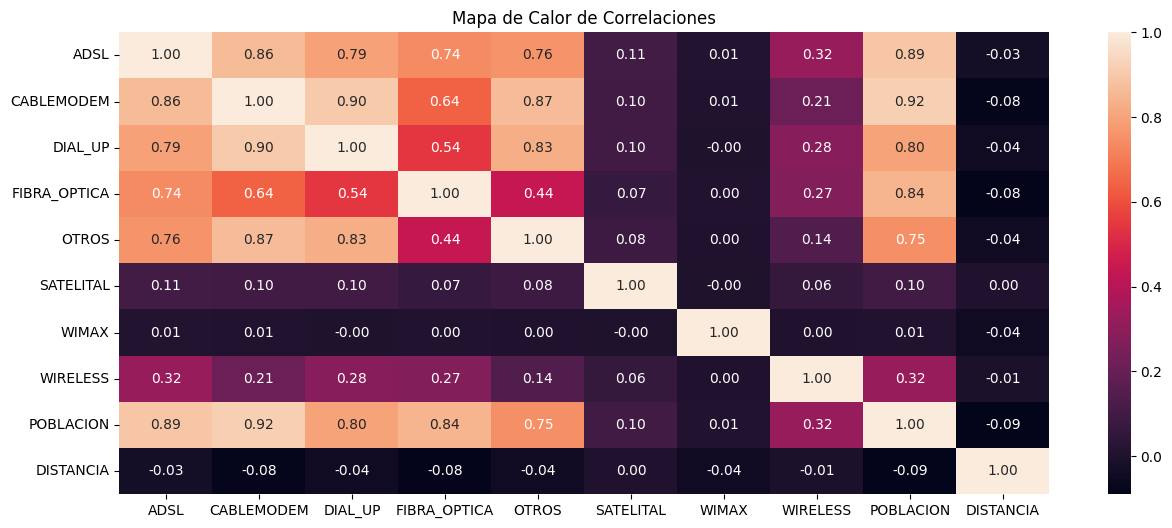

In [66]:

plt.figure(figsize=(15,6))
corr = df_internet[['ADSL','CABLEMODEM','DIAL_UP','FIBRA_OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS','POBLACION','DISTANCIA']]
corr = corr.corr()
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 2.2 Estudio de la correlación
#### Se observa:

Hay una correlación entre la poblacion y las tecnologias de fibra óptica, cablemodem y adsl

**podriamos analizar el promedio poblacional que tienen una cantidad de conexiones igual o superior a la media**

La distancia al centro de la capital no señala ninguna correlacion con ninguna de las tecnologías

In [50]:
cols = df_internet.columns.values[3:11]
data = []
for x in cols:    
    data.append(df_internet[x].sum())            
df_sumas = pd.DataFrame(data,cols,columns=['Totales']).sort_values(by='Totales', ascending=False)
df_sumas

,Totales
CABLEMODEM,5927825
FIBRA_OPTICA,3985190
ADSL,765622
WIRELESS,591337
OTROS,197508
DIAL_UP,11646
SATELITAL,2806
WIMAX,1744


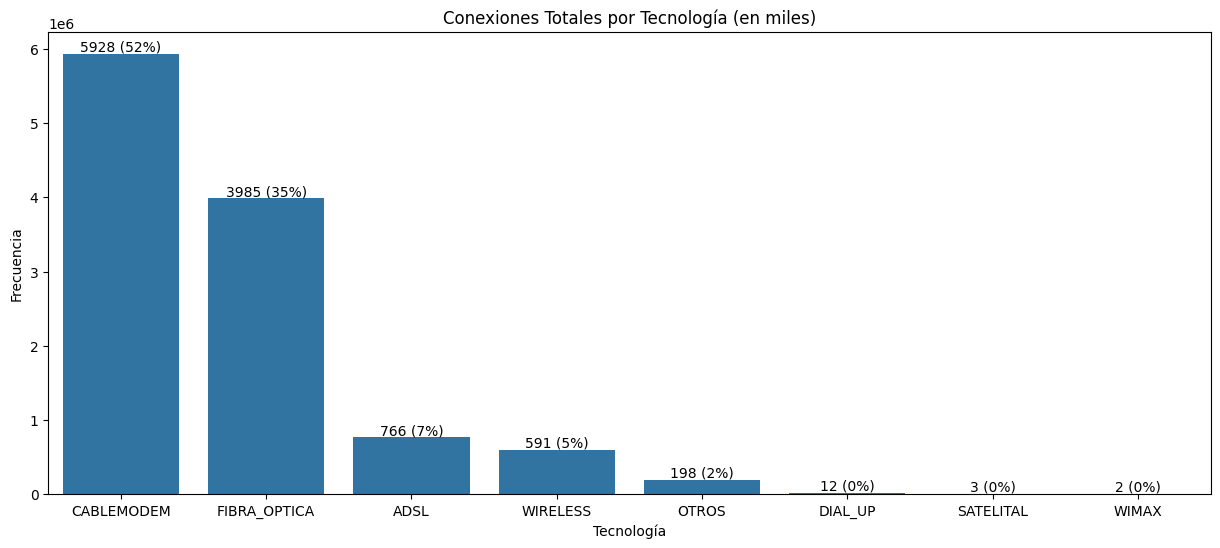

In [51]:
total = df_sumas['Totales'].sum()
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_sumas['Totales'])
#bars = ax.bar_label(ax.containers[0])
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{value/1000:.0f} ({value/total:.0%})' for value in bars.datavalues])
plt.title('Conexiones Totales por Tecnología (en miles)')
plt.xlabel('Tecnología')
plt.ylabel('Frecuencia')
plt.show()

## 2.3 Frecuencia de cada tecnología a nivel Pais
### Se observa claramente que las tecnologías predominantes son Cable Módem y Fibra Óptica con el 87% de las conexiones

In [52]:
#estudiaremos la relacion entre la cantidad de conexion y la poblacion total
provincia = df_internet.groupby('PROVINCIA').agg({'ADSL':'sum','CABLEMODEM':'sum','DIAL_UP':'sum','FIBRA_OPTICA':'sum','OTROS':'sum','SATELITAL':'sum','WIMAX':'sum','WIRELESS':'sum','POBLACION':'sum'})
p = provincia.drop(columns=['POBLACION'])
p = p.sum(axis=1)
provincia['Total'] = p
provincia['Cobertura'] = p.div(provincia['POBLACION'])
provincia.sort_values(by='Cobertura', ascending=False, inplace=True)
provincia.head(10)


,ADSL,CABLEMODEM,DIAL_UP,FIBRA_OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,POBLACION,Total,Cobertura
PROVINCIA,,,,,,,,,,,
CABA,70108,1177475,2050,203756,46762,67,0,4493,2890151,1504711,0.520634
TIERRA DEL FUEGO,9357,48005,305,3684,4,23,0,177,125823,61555,0.489219
LA PAMPA,6844,59007,162,35556,872,72,0,19681,302065,122194,0.404529
SAN LUIS,4038,41260,165,31539,0,34,0,78954,409796,155990,0.380653
CHUBUT,26306,77217,857,26356,8906,153,0,30867,484354,170662,0.352350
CORDOBA,102812,448841,63,458852,8753,95,71,59249,3089299,1078736,0.349185
BUENOS AIRES,195039,2732476,5753,1770222,66766,1042,1238,145698,14488589,4918234,0.339456
NEUQUEN,24076,73298,439,41577,183,131,152,24387,520280,164243,0.315682
SANTA FE,86548,399817,106,374288,10952,106,0,44138,3042314,915955,0.301072


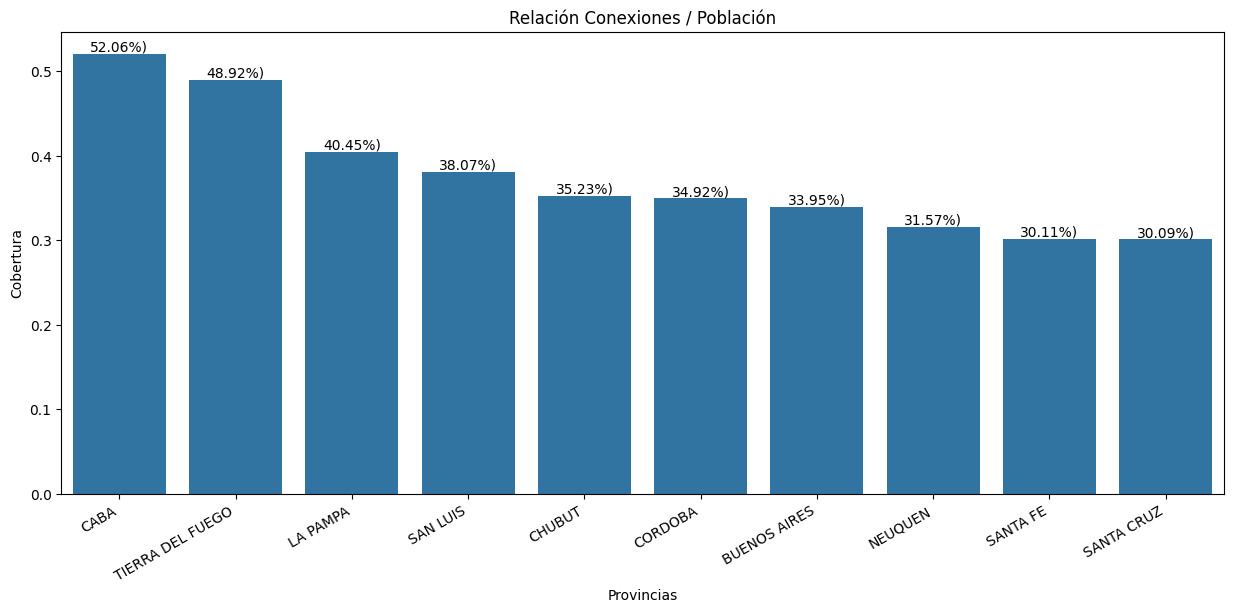

In [53]:

plt.figure(figsize=(15,6))
ax = sns.barplot(data=provincia[:10]['Cobertura'])
#bars = ax.bar_label(ax.containers[0])
bars = ax.containers[0]
ax.bar_label(bars, labels=[f'{value:.2%})' for value in bars.datavalues])
plt.title('Relación Conexiones / Población')
plt.xlabel('Provincias')
plt.ylabel('Cobertura')
plt.xticks(rotation= 30, ha='right')
plt.show()

## 2.4 Relación entre conexiones y población por provincia
### Se observan las provincias que mayor relacion presentan entre cantidad de conexiones y su poblacion, apenas una llega al 50% Se podria pensar que hay mucho por desarrollar

In [54]:
''' Sumarizo las conexiones agrupandolas por partido
'''
partido = df_internet.groupby(['PROVINCIA','PARTIDO']).agg({'ADSL':'sum','CABLEMODEM':'sum','DIAL_UP':'sum','FIBRA_OPTICA':'sum','OTROS':'sum','SATELITAL':'sum','WIMAX':'sum','WIRELESS':'sum'})

partido['Total'] = partido.sum(axis=1)

partido.sort_values(by='Total', ascending=False, inplace=True)
partido[:10]

ADSL  CABLEMODEM  DIAL_UP  FIBRA_OPTICA  \
PROVINCIA    PARTIDO                                                        
CABA         COMUNA 14           70108     1177475     2050        203756   
CORDOBA      CAPITAL             28677      206084       42        281390   
SANTA FE     ROSARIO             14611      185833       72        197989   
BUENOS AIRES LA MATANZA           5611      242890      320        114159   
             GENERAL PUEYRREDÓN  11953      115206      512        156890   
             LA PLATA             7664      199327      517         67925   
TUCUMAN      CAPITAL             22302       19719       27        149883   
BUENOS AIRES LOMAS DE ZAMORA       495      132425      257         47188   
             QUILMES               160      116534      212         54422   
             ALMIRANTE BROWN       174       98859      148         71086   

                                 OTROS  SATELITAL  WIMAX  WIRELESS    Total  
PROVINCIA    PARTIDO                                                         
CABA         COMUNA 14           46762         67      0      4493  1504711  
CORDOBA      CAPITAL              1218         11      0      4356   521778  
SANTA FE     ROSARIO              1041          9      0      7260   406815  
BUENOS AIRES LA MATANZA           8100         11      0      5954   377045  
             GENERAL PUEYRREDÓN    469          8      0      4127   289165  
             LA PLATA             4026         10      0      5541   285010  
TUCUMAN      CAPITAL               338         15      0       373   192657  
BUENOS AIRES LOMAS DE ZAMORA      2831          5      0      3316   186517  
             QUILMES              2390          3      0       690   174411  
             ALMIRANTE BROWN       521          6      0       739   171533

In [55]:
''' 
Ya tengo los datos sumarizados por provincia y por localidad, analizo las principales medidas de tendencia central
'''

df_internet['Total'] = df_internet.iloc[:,np.arange(3,11)].sum(axis=1)
df_internet.sort_values(by='Total', ascending=False, inplace=True)

data = []
l = df_internet['Total']
pa = partido['Total']
p = provincia['Total']

data.append(['Localidad',l.min(),l.quantile(0.25),l.median(),l.quantile(0.75) ,l.max(),l.mean(),l.mode()[0],l.std(),l.mean()/l.std()*100])
data.append(['Partido',pa.min(),pa.quantile(0.25),pa.median(),pa.quantile(0.75),pa.max(),pa.mean(),pa.mode()[0],pa.std(),pa.mean()/pa.std()*100])
data.append(['Provincia',p.min(),p.quantile(0.25),p.median(),p.quantile(0.75),p.max(),p.mean(),p.mode()[0],p.std(),p.mean()/p.std()*100])

dist = pd.DataFrame(data,columns=['Area','Min','25%','Mediana','75%','Max','Promedio','Moda','Desvío E.','Coef. Var (%)'])
dist.style.format(precision=2)


,Area,Min,25%,Mediana,75%,Max,Promedio,Moda,Desvío E.,Coef. Var (%)
0,Localidad,1,29.75,170.50,1058.00,1504711,3890.13,1,32370.64,12.02
1,Partido,1,633.00,3185.00,13135.50,1504711,22472.95,4,81741.12,27.49
2,Provincia,61555,114136.00,161052.50,270179.50,4918234,478486.58,61555,1011385.07,47.31


## 2.5 Análisis de las medidas de tendencia central, segmentdas por Localidad, Partido y Provincia
### Si bien los nodos de conexión, ya sea una antena, una central tiene una relacion de 1 a 1 con la localidad o bien 1 a n donde esos nodos se encuentran  relativamente cercanos, teniendo en cuenta el costo que implica interconectar nodos, es decir, es mucho menos costoso interconectar nodos, de modo que haya backup, redundancia, dentro de una localidad que dentro de una provincia. Este estudio pretende observar la distribucion de la cantidad de conexiones, por localidad, partido y provincia:
* En todos los casos la dispersión es alta, 75% de las areas tienen menos conexión que el promedio
* si observamos el coeficiente de variacion, la dispersion aumenta para partidos y provincias
* Analizaremos el promedio de la poblacion de los percentile 70 a 80 para investigar si hay localidades con mayor poblacion y pocas conexiones

In [56]:
''' Calculo los percentiles de 70% y 80%
'''
l_inf = df_internet['Total'].quantile(0.7)
l_sup = df_internet['Total'].quantile(0.8)
loc_perc = df_internet[(df_internet['Total'] > l_inf) & (df_internet['Total'] < l_sup)]

# Obtengo la poblacion promedio
prom = loc_perc['POBLACION'].mean()

#Obtengo las localidades muy pobladas con pocas conexiones
loc_obj = df_internet[(df_internet['Total'] < l_inf) & (df_internet['POBLACION'] > prom)].sort_values(by='POBLACION', ascending=False)

print(f"Límite inferior percentil de 70%: {l_inf:.0f} conexiones")
print(f"Límite superior percentil de 80%: {l_sup:.0f} conexiones")
print(f"Poblacion promedio del rango: {prom:.0f} personas")
print(f"Cantidad de Localidades objetivo encontradas: {loc_obj.shape[0]}")
print("5 mas Pobladas:")
loc_obj.head(5)


Límite inferior percentil de 70%: 673 conexiones
Límite superior percentil de 80%: 1714 conexiones
Poblacion promedio del rango: 6321 personas
Cantidad de Localidades objetivo encontradas: 86
5 mas Pobladas:


,PROVINCIA,PARTIDO,LOCALIDAD,ADSL,CABLEMODEM,DIAL_UP,FIBRA_OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,POBLACION,DISTANCIA,Total
1753,MENDOZA,GUAYMALLÉN,LA PRIMAVERA,0,0,0,0,0,0,0,27,189067,965.51,27
2620,SANTA FE,ROSARIO,VILLA GOBERNADOR GÁLVEZ,0,17,0,9,0,0,0,39,80769,267.39,65
267,BUENOS AIRES,GENERAL SAN MARTÍN,CIUDAD JARDIN EL LIBERTADOR,0,5,0,0,0,0,0,0,63479,16.28,5
386,BUENOS AIRES,LOMAS DE ZAMORA,VILLA CENTENARIO,0,36,0,0,0,0,0,300,51834,17.25,336
284,BUENOS AIRES,HURLINGHAM,WILLIAM C. MORRIS,0,21,0,14,0,0,0,392,51471,21.61,427


## 2.6 Localidades objetivos en funcion del análisis del punto 2.5
### Si tuviéramos una distribucion normal cualquier Localidad cuya población fuera superior a la poblacion promedio de las localidades que se encuentran en la media de la distribucion de las conexiones.
### En base a lo observado en el punto anterior se toma como referencia rango de los percentiles 70 y 80 y se encuentran 86 localidades cuyas poblacion superan el promedio del percentil mencionado:

* Serían localidades con mucha población y pocas conexiones, posibles candidatas para expandir el negocio